In [17]:
import sys
sys.path.append('../../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
# settings
CMAP = 'viridis'
dim = 2

In [19]:
# import node embeddings
df = pd.read_csv(
    f"./facebook_alpha-0.1_beta-0.1_ws-10_neg-5_lr-0.025_icom-36_ind-36_ds-0.0_d-{dim}_type-BGMM_k-10.txt",
    sep="\t| ",
    header=None
)
df = df.rename(columns={0: 'node'})
df.set_index(['node'], inplace=True)

/Users/anton/miniconda3/envs/MT/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [20]:
# import train
train = pd.read_csv("./facebook_train.csv", index_col=0)

In [21]:
# import predicted labels
labels = pd.read_csv(f"./labels_pred_BGMM_d{dim}_k10.txt", header=None)
labels = labels.rename(columns={0: 'label'})
labels.label = labels.astype(int)
labels

,label
0,3
1,3
2,3
3,3
4,3
...,...
3959,0
3960,0
3961,0
3962,0


In [22]:
df = df.join(labels)

In [23]:
# get nx train graph
G = nx.from_pandas_edgelist(train, "u", "v")

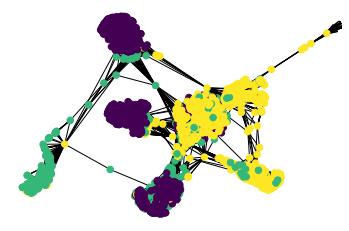

In [25]:
# plot spring graph
plt.axis("off")
nx.draw_networkx(G,
                 node_color=df.label,
                 cmap=plt.get_cmap(CMAP),
                 with_labels=False,
                 node_size=42)

In [27]:
df

,1,2,label
node,,,
0,-6.034800,2.406848,3.0
1,-5.836558,2.331109,3.0
2,-5.208809,2.064520,3.0
3,-6.103177,2.438485,3.0
4,-5.338110,2.101189,3.0
...,...,...,...
4033,-1.178890,-3.420322,NaN
4034,-1.125550,-3.093886,NaN
4036,-1.115993,-3.119357,NaN


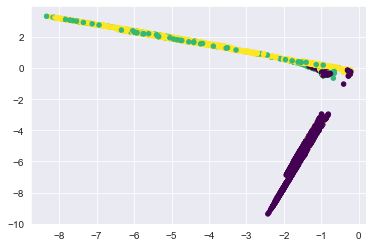

In [28]:
# plot embedding
plt.scatter(df[1], df[2], 20, c=df.label, marker="o", cmap=CMAP)